In [103]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, f1_score,roc_auc_score, roc_curve

In [90]:
def xgboost(train_data,test_data):
    import xgboost as xgb
    train = train_data.drop(["t","movement"],1)
    label_train = train_data["movement"].astype(int)
    test = test_data.drop(["t","movement"],1)
    label_test = test_data["movement"].astype(int)
    xgb_params = {'max_depth': [2,3], 
              'learning_rate': [x/10 for x in list(range(1,7))],
              'n_estimators': [0, 25, 50],
              'objective': ['binary:logistic']}

    xgb_model = xgb.XGBClassifier(gamma=1, random_state=42, reg_lambda=200, use_label_encoder=False, eval_metric = 'logloss')
    xgb_model = GridSearchCV(xgb_model, xgb_params, scoring='roc_auc')
    xgb_model.fit(train, label_train)
    print(xgb_model.best_estimator_)
    evaluate_model(xgb_model, train, label_train)
    

In [94]:
def randomforest(train_data, test_data):
    train = train_data.drop(["t","movement"],1)
    label_train = train_data["movement"].astype(int)
    test = test_data.drop(["t","movement"],1)
    label_test = test_data["movement"].astype(int)
    rfc_parameters = {'n_estimators': [50, 100, 200],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth' : [3,4,5,6,7],
                'criterion' :['gini', 'entropy'],
                'random_state': [42]}

    rfc_model = RandomForestClassifier()

    rfc_model = GridSearchCV(rfc_model, rfc_parameters, scoring='roc_auc')

    rfc_model = rfc_model.fit(train, label_train)

    print(rfc_model.best_estimator_)

    evaluate_model(rfc_model, train, label_train)

In [105]:
def decisiontree (train_data, test_data):
    train = train_data.drop(["t","movement"],1)
    label_train = train_data["movement"].astype(int)
    test = test_data.drop(["t","movement"],1)
    label_test = test_data["movement"].astype(int)
    dt_params = {"criterion":['gini','entropy'],
                 'max_depth':[3,4,5,6,7,8],
                 'random_state': [42]}

    dt_model = DecisionTreeClassifier()
    dt_model = GridSearchCV(dt_model, dt_params, scoring='roc_auc')
    dt_model.fit(train, label_train)
    print(dt_model.best_estimator_)
    evaluate_model(dt_model, train, label_train)

In [86]:
def evaluate_model(model, test, label_test):

    predicted = model.predict(test)
    print("accuracy:", str(accuracy_score(label_test, predicted)))
    
    print("precision:", str(precision_score(label_test, predicted, average='weighted')))

    print("recall:", str(recall_score(label_test, predicted, average='weighted')))
   
    print("f1", str(f1_score(label_test, predicted, average='weighted')))
    
    print("metrics.roc_auc_score", str(roc_auc_score(label_test, predicted, average='weighted')))

    plot_confusion_matrix(model, test, label_test,
                      display_labels=list(set(label_test)),
                      cmap=plt.cm.Blues)
    
    classification = classification_report(label_test, predicted)
    print(classification)

In [ ]:
one_one = ['df_day_1_1', "df_day_1_1_v", "df_month_1_1","df_month_1_1_v", "df_week_1_1", "df_week_1_1_v"]
five_one = ['df_day_5_1', "df_day_5_1_v", "df_month_5_1","df_month_5_1_v", "df_week_5_1", "df_week_5_1_v"]

In [101]:
train = pd.read_csv('./data_preprocess/train df_day_1_1.csv')
test = pd.read_csv('./data_preprocess/testdf_day_1_1.csv')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.4, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=25, n_jobs=8,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=200,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)
accuracy: 0.5623762376237624
precision: 0.5634512956246119
recall: 0.5623762376237624
f1 0.5579706467527069
metrics.roc_auc_score 0.5610018197791165
              precision    recall  f1-score   support

           0       0.57      0.46      0.51       249
           1       0.56      0.66      0.60       256

    accuracy                           0.56      

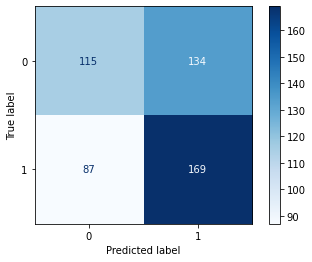

In [93]:
xgboost(train, test)

RandomForestClassifier(criterion='entropy', max_depth=7, random_state=42)
accuracy: 0.7623762376237624
precision: 0.7700407309023586
recall: 0.7623762376237624
f1 0.76026380884214
metrics.roc_auc_score 0.7611226154618473
              precision    recall  f1-score   support

           0       0.81      0.67      0.74       249
           1       0.73      0.85      0.78       256

    accuracy                           0.76       505
   macro avg       0.77      0.76      0.76       505
weighted avg       0.77      0.76      0.76       505



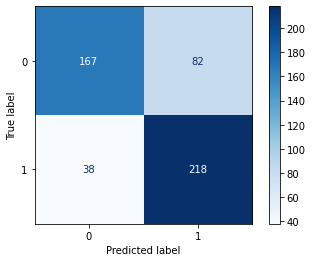

In [102]:
randomforest(train, test)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)
accuracy: 0.6178217821782178
precision: 0.6360645815587971
recall: 0.6178217821782178
f1 0.6020344284714088
metrics.roc_auc_score 0.6150853413654618
              precision    recall  f1-score   support

           0       0.68      0.42      0.52       249
           1       0.59      0.81      0.68       256

    accuracy                           0.62       505
   macro avg       0.64      0.62      0.60       505
weighted avg       0.64      0.62      0.60       505



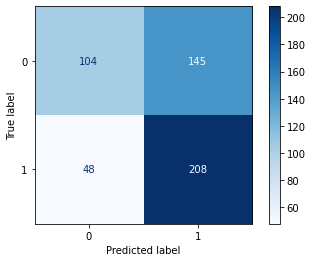

In [106]:
decisiontree(train,test)